# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in the file `craftcans.csv`, and look at the first first rows

In [52]:
df = pd.read_csv('craftcans.csv',na_values = ['no data'])
df.head(50)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.60%,47
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.70%,25
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.20%,42


In [7]:
#display all rows of any dfs in this notebook
pd.set_option('display.max_rows', None)

#display all columns of any dfs in this notebook
pd.set_option('display.max_columns', None)

## How many rows do you have in the data? What are the column types?

In [8]:
df.shape

(2416, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Beer      2416 non-null   object
 1   Brewery   2410 non-null   object
 2   Location  2410 non-null   object
 3   Style     2405 non-null   object
 4   Size      2410 non-null   object
 5   ABV       2348 non-null   object
 6   IBUs      2410 non-null   object
dtypes: object(7)
memory usage: 132.3+ KB


In [10]:
df.dtypes

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [11]:
df.groupby('Brewery')['Beer'].sum().sort_values(ascending=False).head(10)

Brewery
Brew Bus Brewing                   You're My Boy, BlueLast Stop IPARollin Dirty R...
Lewis and Clark Brewing Company    Yellowstone Golden AleTumbleweed IPALewis & Cl...
Blue Dog Mead                                              Yellow CollarGreen Collar
Wind River Brewing Company                     Wyoming Pale AleWind River Blonde Ale
Burn 'Em Brewing                   Wrath of PeleBlack Beer'dMr. TeaPale AlementHo...
Worthy Brewing Company             Worthy IPAEasy Day KolschLights Out Vanilla Cr...
Tallgrass Brewing Company          Wooden RoosterGinger Peach SaisonZombie Monkie...
Woodchuck Hard Cider                                      Woodchuck Amber Hard Cider
Wolverine State Brewing Company                              Wolverine Premium Lager
7venth Sun                                                        Wolfman's Berliner
Name: Beer, dtype: object

In [12]:
# # of distinct values in a column (Pandas cheat sheet)
df.groupby('Brewery')['Beer'].nunique().sort_values(ascending=False).head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           41
Sun King Brewing Company      38
Cigar City Brewing Company    24
Sixpoint Craft Ales           24
Great Crescent Brewery        20
21st Amendment Brewery        19
SanTan Brewing Company        19
Upslope Brewing Company       18
Great River Brewery           18
Name: Beer, dtype: int64

## What is the most common ABV? (alcohol by volume)

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [82]:
df['ABV'] = df['ABV'].str.replace("%","").astype(float)
df['ABV']

0        4.5
1        4.9
2        4.8
3        6.0
4        6.0
5        5.6
6        8.0
7       12.5
8        7.7
9        4.2
10       5.0
11       6.6
12       4.0
13       5.5
14       7.6
15       5.1
16       6.5
17       6.0
18       5.0
19       5.2
20       4.8
21       7.2
22       6.7
23       4.9
24       8.0
25       7.5
26       6.0
27       8.0
28       6.3
29       5.8
30       4.7
31       5.6
32       4.6
33       6.3
34       9.3
35       6.2
36       6.0
37       4.8
38       7.7
39       9.7
40       5.0
41       8.7
42       6.1
43       7.1
44       8.3
45       5.0
46       9.5
47       7.3
48       7.1
49       6.5
50       8.0
51       5.2
52       6.7
53       6.0
54       4.1
55       4.8
56       5.5
57       4.8
58       5.8
59       6.5
60       5.0
61       5.0
62       5.8
63       4.5
64       8.5
65       6.5
66       5.8
67       5.2
68      12.0
69       7.2
70       5.8
71       7.0
72       5.5
73       5.5
74       5.4
75       5.3
76       5.5

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [14]:
df['ABV'].dtypes

dtype('float64')

In [15]:
df['ABV'].value_counts().sort_values(ascending=False).head()

ABV
5.0    215
5.5    158
6.0    125
6.5    123
5.2    107
Name: count, dtype: int64

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [16]:
df['ABV'].describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

In [17]:
df['ABV'].median()

5.6

<Axes: >

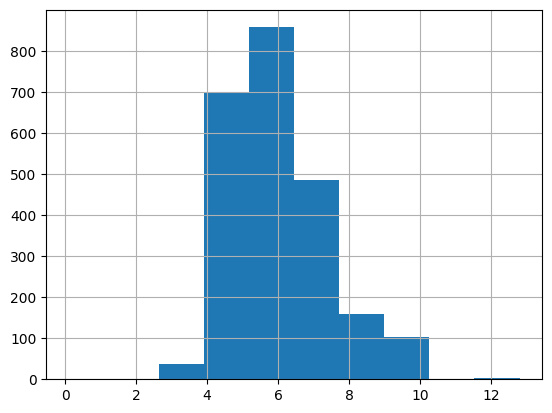

In [18]:
df['ABV'].hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [19]:
df['ABV'].isnull().sum()

68

In [20]:
df['ABV'].isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [21]:
# one beer is listed multiple times
df[df['Location'] == 'Portland, OR']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
206,Hard Cider,Hopworks Urban Brewery,"Portland, OR",Cider,16 oz.,6.8,Does not apply
207,Totally Radler,Hopworks Urban Brewery,"Portland, OR",Radler,16 oz.,2.7,21
285,Hop in the ‘Pool Helles,Base Camp Brewing Co.,"Portland, OR",American Pilsner,12 oz.,4.9,22
286,P-Town Pilsner,Alameda Brewing,"Portland, OR",American Pilsner,12 oz.,4.0,20
287,Klickitat Pale Ale,Alameda Brewing,"Portland, OR",American Pale Ale (APA),12 oz.,5.3,36
288,Yellow Wolf Imperial IPA,Alameda Brewing,"Portland, OR",American Double / Imperial IPA,12 oz.,8.2,103
289,Nonstop Hef Hop,Hopworks Urban Brewery,"Portland, OR",American Pale Wheat Ale,16 oz.,3.9,20
290,Nonstop Hef Hop,Hopworks Urban Brewery,"Portland, OR",American Pale Wheat Ale,16 oz.,3.9,20
291,Nonstop Hef Hop,Hopworks Urban Brewery,"Portland, OR",American Pale Wheat Ale,16 oz.,3.9,20
292,Nonstop Hef Hop,Hopworks Urban Brewery,"Portland, OR",American Pale Wheat Ale,16 oz.,3.9,20


In [22]:
# this is why this method is not accurate
df['Location'].value_counts().sort_values(ascending=False).head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

In [23]:
# we need the nunique to calculate how many unique beers each brewery produces
df.groupby('Location')['Beer'].nunique().sort_values(ascending=False).head(10)

Location
Grand Rapids, MI     66
Chicago, IL          52
Indianapolis, IN     43
Boulder, CO          41
Portland, OR         41
Denver, CO           40
San Diego, CA        38
Brooklyn, NY         37
Seattle, WA          35
San Francisco, CA    31
Name: Beer, dtype: int64

## List all of the beer from Brooklyn, NY

In [24]:
df_Brooklyn = df[df['Location'] == 'Brooklyn, NY']
df_Brooklyn

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19


## What brewery in Brooklyn puts out the most different cans of beer?

In [25]:
df_Brooklyn.groupby('Brewery')['Beer'].nunique().sort_values(ascending=False).head()

Brewery
Sixpoint Craft Ales    24
Brooklyn Brewery        5
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Beer, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [26]:
df_Brooklyn[df_Brooklyn['Brewery']=="Sixpoint Craft Ales"].groupby('Style')['Beer'].nunique().sort_values(ascending=False).head()

Style
American IPA                      4
American Double / Imperial IPA    2
Baltic Porter                     2
Cream Ale                         2
German Pilsener                   2
Name: Beer, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [27]:
df['State'] = df['Location'].str[-2:].dropna()
df

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50,MN
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26,MN
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19,MN
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38,MN
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25,MN
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.6,47,MN
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68,KY
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80,KY
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.7,25,KY
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.2,42,KY


In [28]:
del df['state_abbrev']

KeyError: 'state_abbrev'

### Now *count* all of the breweries in New York state

In [ ]:
df[df['State'] == 'NY']['Brewery'].nunique()

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [ ]:
df[df['Style'].str.contains("IPA", na=False)]

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [ ]:
df['IBUs'].mean()

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

In [58]:
df['IBUs'] = df['IBUs'].replace("Does not apply", np.nan)
df['IBUs'] = df['IBUs'].astype(float)
df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.60%,47.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80.0
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.70%,25.0
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.20%,42.0


In [59]:
df['IBUs'].mean()

42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: >

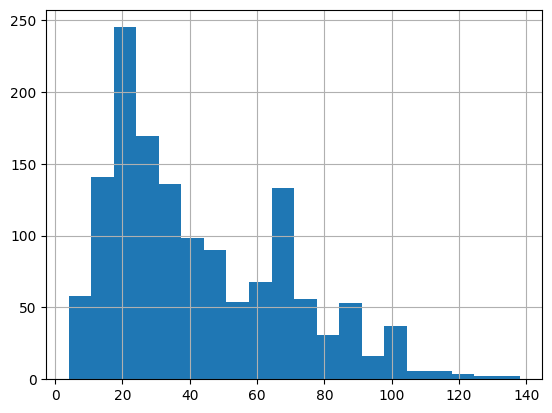

In [34]:
df['IBUs'].hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [36]:
df['IBUs'].quantile(0.75)

64.0

In [38]:
df[df['IBUs']>df['IBUs'].quantile(0.75)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0,KY
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0,KY
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0,KY
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0,KY
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0,MA
22,Hoponius Union,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,12 oz.,6.7,65.0,MA
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0,CA
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0,CA
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0,CA
46,Yeti Imperial Stout,Great Divide Brewing Company,"Denver, CO",Russian Imperial Stout,12 oz.,9.5,75.0,CO


## List all of the beers with IBUs below the 25th percentile

In [39]:
df[df['IBUs']<df['IBUs'].quantile(0.25)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0,MN
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0,KY
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0,KY
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0,KY
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0,MA
20,Leisure Time,Jack's Abby Craft Lagers,"Framingham, MA",American Pale Lager,12 oz.,4.8,15.0,MA
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.7,19.0,CA
31,Westfalia,Fort Point Beer Company,"San Francisco, CA",American Amber / Red Ale,12 oz.,5.6,16.0,CA
32,KSA,Fort Point Beer Company,"San Francisco, CA",Kölsch,12 oz.,4.6,17.0,CA
54,Sparkle,Petoskey Brewing,"Petoskey, MI",American Pale Lager,16 oz.,4.1,12.0,MI


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [46]:
df.groupby('Style')['IBUs'].median().dropna().sort_values(ascending=False)

Style
American Barleywine                    96.0
Russian Imperial Stout                 94.0
American Double / Imperial IPA         91.0
American Double / Imperial Pilsner     85.0
American Black Ale                     73.0
Belgian Strong Dark Ale                72.0
American Strong Ale                    70.0
American IPA                           69.0
English Stout                          66.0
American India Pale Lager              65.0
Belgian IPA                            61.0
English Barleywine                     60.0
Rye Beer                               57.0
English Strong Ale                     52.0
Baltic Porter                          52.0
American Double / Imperial Stout       51.0
English India Pale Ale (IPA)           47.0
American White IPA                     45.0
American Pale Ale (APA)                44.0
Extra Special / Strong Bitter (ESB)    41.0
California Common / Steam Beer         41.0
Old Ale                                40.0
American Stout            

<Axes: >

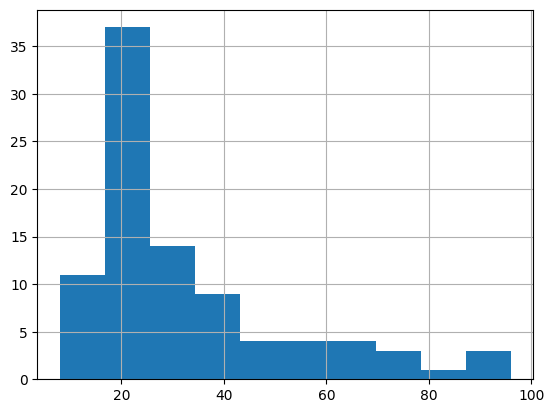

In [47]:
df.groupby('Style')['IBUs'].median().dropna().sort_values(ascending=False).hist()

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [50]:
df[df['IBUs']>df['IBUs'].quantile(0.75)]['Style'].value_counts().head()

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64

In [51]:
df[df['IBUs']<df['IBUs'].quantile(0.25)]['Style'].value_counts().head()

Style
American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: count, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [68]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['IBUs'].mean()

18.982142857142858

## Draw a histogram of the IBUs of those beers

<Axes: >

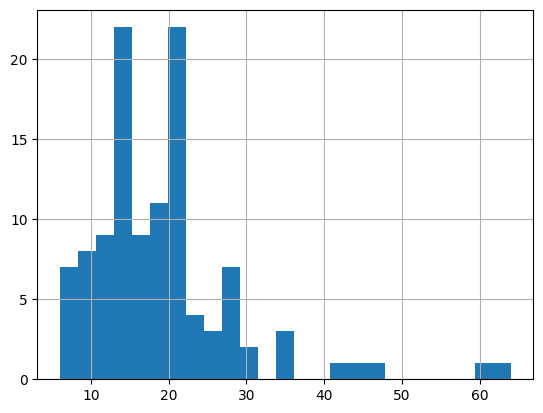

In [69]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['IBUs'].hist(bins=25)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [74]:
df[df['Style'].str.contains("IPA", na=False)]['IBUs'].mean()

71.94897959183673

<Axes: >

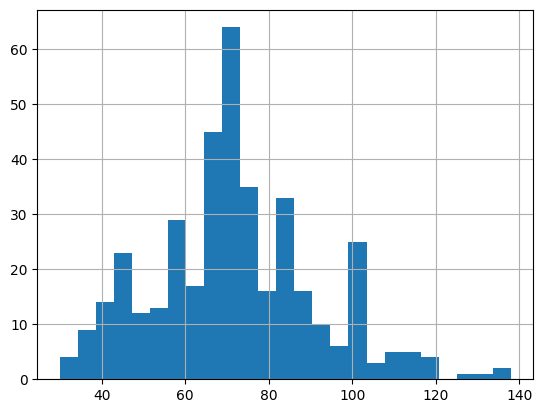

In [75]:
df[df['Style'].str.contains("IPA", na=False)]['IBUs'].hist(bins=25)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

<Axes: >

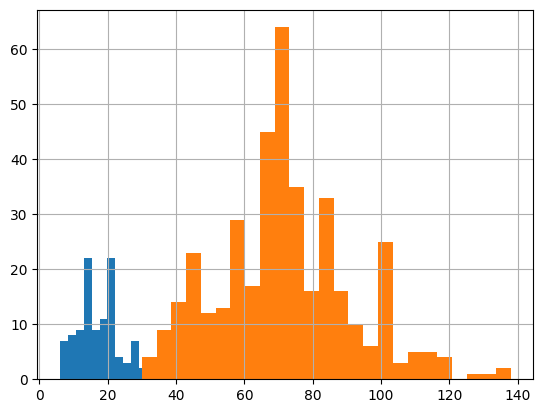

In [78]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['IBUs'].hist(bins=25)
df[df['Style'].str.contains("IPA", na=False)]['IBUs'].hist(bins=25)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [87]:
Wheet_mean = df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['ABV'].mean()
Wheet_mean

5.043715846994536

In [88]:
ipa_mean = df[df['Style'].str.contains("IPA", na=False)]['ABV'].mean()
ipa_mean

6.879285714285714

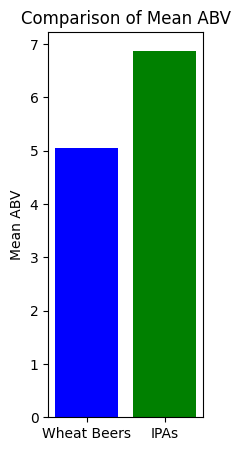

In [93]:
# Chat GPT answer
# Categories
categories = ['Wheat Beers', 'IPAs']

# Mean values for each category
means = [Wheet_mean, ipa_mean]

plt.figure(figsize=(2, 5))  # Set the figure size (optional)
plt.bar(categories, means, color=['blue', 'green'])  # Create a bar chart
plt.title('Comparison of Mean ABV')  # Add a title
plt.ylabel('Mean ABV')  # Label the y-axis
plt.show()


## Good work!

In [ ]:
Merci!!